In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import mean_squared_error

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
readme_text = np.array(open(f'./ml-1m/README').read().splitlines())
start_index = np.flatnonzero(np.core.defchararray.find(readme_text,'Occupation is chosen')!=-1)[0]
end_index = np.flatnonzero(np.core.defchararray.find(readme_text,'MOVIES FILE DESCRIPTION')!=-1)[0]
occupation_list = [x.split('"')[1] for x in readme_text[start_index:end_index][2:-1].tolist()]
occupation_dict = dict(zip(range(len(occupation_list)), occupation_list))

users_df = pd.read_csv(f'./ml-1m/users.dat',
                       delimiter='::', engine='python', header=None,
                       names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])
users_df['occupation'] = users_df['occupation'].replace(occupation_dict)
users_df.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


In [3]:
encode_attribute = pd.get_dummies(users_df[['gender','age','occupation']].astype(str))
encode_attribute

,gender_F,gender_M,age_1,age_18,age_25,age_35,age_45,age_50,age_56,occupation_K-12 student,...,occupation_other,occupation_programmer,occupation_retired,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer
0,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6036,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6037,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6038,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [4]:
user_boolean_embedding = encode_attribute.to_numpy()[:,:]
user_boolean_embedding

array([[ True, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [5]:
_, idx = np.unique(user_boolean_embedding, axis = 0, return_index=True)
idx

array([ 355, 2804, 1045,  177,    1,  759, 1121,   89,  947,  443,  724,
       1735,   30,  127, 2387, 1169,  965,   79, 5222,  153, 1061,  551,
        147,  306,  365,  269,  286,  366,  810,  325, 2404,  243,  432,
        295, 4877, 1144,  626,   16,  349, 2003,  106,   43,  160,  108,
        124,  215,  104,   39,  390,  549,    3, 1288, 2240, 4132,   32,
        826,   12,   55,  101,  326,   99,  156,  110,   73,  140,   64,
         13,  265,  122, 1558,   28,  319, 1041, 1284, 1007,  332,    6,
       4561,    4,  573,   65,    8,  111,    2,   19,    7,   52,   26,
       4687,   41,   14,  236,  235,   47,   35,   57,  148, 3112,  137,
         45,  256,  180,   20,   21,  196,   48,  188,  437,  125, 1786,
        391,  989,  185,   24,  142,  135,   63,  228,  736,  774, 1467,
       4412, 4477,  718, 4786, 1817, 4005, 3045, 4806, 1814,   18, 4186,
        886, 1037,  515,  163, 2405,  885, 3780,   88, 4986, 2333,  601,
        758,  333,  314, 1179, 4230,  170, 1110,  8

In [6]:
import numpy as np

# Define the matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3], [7, 8, 9], [4, 5, 6]])

# Find the unique rows and their indices
unique_rows, unique_indices = np.unique(matrix, axis=0, return_index=True)

# Find the indices of duplicate rows
duplicate_indices = np.setdiff1d(np.arange(len(matrix)), unique_indices)

# Print the indices of duplicate rows
print("Indices of duplicate rows:")
print(duplicate_indices)


Indices of duplicate rows:
[2 4]


In [7]:
user_boolean_embedding[355]

array([False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [8]:
# Define the matrix
matrix = [[1, 2, 3], [4, 5, 6], [1, 2, 3], [7, 8, 9], [4, 5, 6]]

# Define the row you are interested in
row_of_interest = [4, 5, 6]

# Create an empty list to store the indices of the matching rows
matching_indices = []

# Iterate through the matrix and check for rows that match the row of interest
for i, row in enumerate(matrix):
    if row == row_of_interest:
        matching_indices.append(i)

# Print the list of indices of the matching rows
print("Indices of rows that match the row of interest:")
print(matching_indices)


Indices of rows that match the row of interest:
[1, 4]


# decompose linear system by age and gender

In [51]:
user_embedding = torch.load('./KG_embedding/300_epochs_DistMult_gpu34.pt', map_location ='cpu')
user_embedding = user_embedding.numpy()

In [52]:
groups = users_df.groupby(['gender', 'age'])
for name, group in groups:
    indices = list(group.index)
    print('Gender:', name[0], ', Age:', name[1], ', Number of users:', len(group), ', Indices:', indices)

Gender: F , Age: 1 , Number of users: 78 , Indices: [0, 50, 74, 85, 98, 118, 193, 209, 467, 469, 483, 605, 628, 633, 742, 887, 1044, 1087, 1153, 1186, 1194, 1347, 1364, 1420, 1433, 1507, 1562, 1567, 1925, 1928, 2044, 2132, 2136, 2154, 2161, 2201, 2284, 2345, 2417, 2656, 2809, 2857, 3086, 3233, 3381, 3603, 3666, 3842, 3864, 4085, 4157, 4255, 4492, 4548, 4571, 4574, 4605, 4689, 4882, 5062, 5113, 5246, 5295, 5301, 5410, 5419, 5458, 5513, 5523, 5524, 5686, 5750, 5755, 5767, 5839, 5843, 5988, 6005]
Gender: F , Age: 18 , Number of users: 298 , Indices: [17, 33, 37, 40, 91, 100, 121, 161, 175, 199, 202, 212, 223, 241, 245, 248, 267, 297, 304, 309, 312, 364, 371, 377, 399, 427, 429, 458, 463, 472, 479, 499, 527, 530, 540, 560, 568, 600, 604, 618, 665, 694, 700, 745, 813, 841, 844, 854, 966, 994, 1067, 1091, 1093, 1113, 1124, 1145, 1173, 1195, 1231, 1239, 1253, 1256, 1264, 1276, 1282, 1313, 1346, 1355, 1400, 1432, 1459, 1475, 1534, 1554, 1556, 1560, 1579, 1580, 1595, 1604, 1637, 1644, 1658, 166

In [53]:
# Compute average embedding for each group and save to numpy array
group_embeddings = []
for name, group in groups:
    indices = list(group.index)
    group_user_embeddings = user_embedding[indices]
    group_average_embedding = np.mean(group_user_embeddings, axis=0)
    group_embeddings.append(group_average_embedding)

group_embeddings = np.array(group_embeddings)

In [54]:
groupname=[]
for name, group in groups:
    groupname.append(name)
groupname

[('F', 1),
 ('F', 18),
 ('F', 25),
 ('F', 35),
 ('F', 45),
 ('F', 50),
 ('F', 56),
 ('M', 1),
 ('M', 18),
 ('M', 25),
 ('M', 35),
 ('M', 45),
 ('M', 50),
 ('M', 56)]

In [55]:
group_embeddings.shape

(14, 50)

In [56]:
import numpy as np

# Define the group information
groups = [('F', 1), ('F', 18), ('F', 25), ('F', 35), ('F', 45), ('F', 50), ('F', 56),
          ('M', 1), ('M', 18), ('M', 25), ('M', 35), ('M', 45), ('M', 50), ('M', 56)]

# Create a dictionary to map the group information to the corresponding index
group_dict = {(gender, age): i for i, (gender, age) in enumerate(groups)}

# Initialize the boolean indicator array
group_indicator = np.zeros((len(groups), 9))

# Set the corresponding elements in each row to 1
for gender, age in groups:
    index = group_dict[(gender, age)]
    if gender == 'F':
        group_indicator[index, 0] = 1
    else:
        group_indicator[index, 1] = 1
    if age == 1:
        group_indicator[index, 2] = 1
    elif age == 18:
        group_indicator[index, 3] = 1
    elif age == 25:
        group_indicator[index, 4] = 1
    elif age == 35:
        group_indicator[index, 5] = 1
    elif age == 45:
        group_indicator[index, 6] = 1
    elif age == 50:
        group_indicator[index, 7] = 1
    elif age == 56:
        group_indicator[index, 8] = 1

print(group_indicator)

[[1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]]


In [57]:
group_embeddings.shape

(14, 50)

In [58]:
user_embedding = group_embeddings
user_boolean_embedding = group_indicator
attribute_embedding = np.linalg.pinv(user_boolean_embedding).dot(user_embedding)

In [59]:
attribute_embedding.shape

(9, 50)

# Weights of different attributes in the Linear System

In [73]:
from numpy.linalg import norm
norm(attribute_embedding[0])

3.3549237788543915

In [18]:
B = np.dot(user_boolean_embedding, attribute_embedding)

In [19]:
np.random.seed(2)

In [166]:
from sklearn.utils import shuffle
from numpy.linalg import norm
i = 0
r_norm = []
while i < 100:
    user_embedding_shuffled = shuffle(user_embedding)
    attribute_embedding_shuffled = np.linalg.pinv(user_boolean_embedding).dot(user_embedding_shuffled)
    B_shuffled = np.dot(user_boolean_embedding, attribute_embedding_shuffled)
    r_norm.append(norm(B_shuffled - user_embedding_shuffled))
    i = i+1
r_norm

[0.17135530624409026,
 0.14565796056713823,
 0.14235757697820695,
 0.14967054533590943,
 0.16276824688168096,
 0.16306665402374654,
 0.15914825072002287,
 0.1553017038396299,
 0.14073999946569835,
 0.16616830222096368,
 0.17898531370733956,
 0.1669923013587106,
 0.14341875516548594,
 0.1539091885879325,
 0.1821275564328454,
 0.18639429965571297,
 0.17317799072791187,
 0.17269201709317722,
 0.1674089699058403,
 0.11627681474905285,
 0.1501493563283384,
 0.18503737231409026,
 0.1280347190935178,
 0.1347805900001565,
 0.1320100756554332,
 0.19069082997743544,
 0.16564857741845695,
 0.18944103496266368,
 0.16365929783425132,
 0.16370147545317099,
 0.16914157448646577,
 0.15251923220348879,
 0.1543359049192751,
 0.19832922846861883,
 0.1732449457743091,
 0.1638848597224392,
 0.15619757068912568,
 0.18103379124467298,
 0.16948527529843144,
 0.1494350818108163,
 0.15339073965989225,
 0.1290394489665217,
 0.14397365728052122,
 0.19349091806104649,
 0.19907433340509395,
 0.1385215999260085,
 0.

In [167]:
min(r_norm), max(r_norm)

(0.11627681474905285, 0.21499293368511987)

In [168]:
real_norm = norm(B - user_embedding)
real_norm

0.04167683248204415

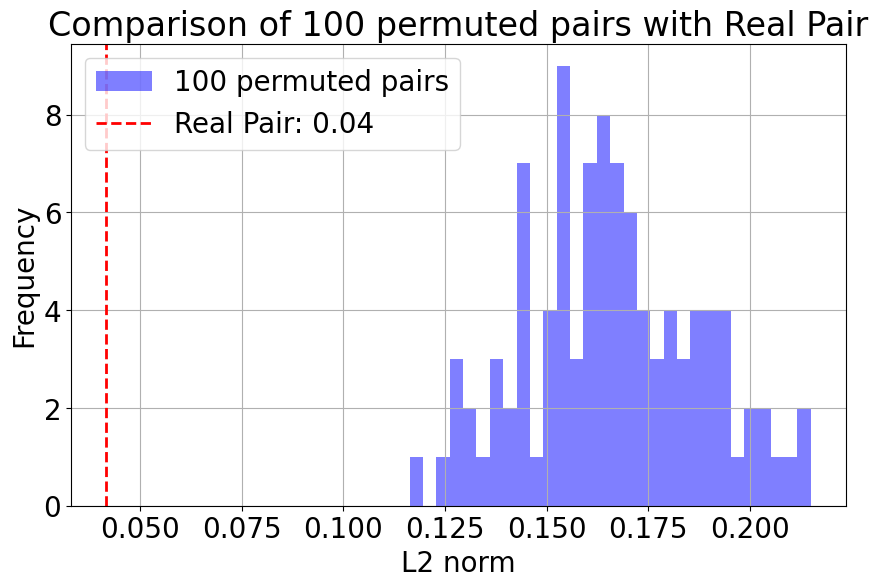

In [169]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(r_norm, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(real_norm, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {real_norm:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('L2 norm')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('KG_L2_TransE.png')
plt.show()



In [170]:
user_embedding = group_embeddings
user_boolean_embedding = group_indicator

# Cosine Similarity

In [171]:
np.random.seed(21701)

In [172]:
import numpy as np
from sklearn.utils import shuffle

def leave_one_out_cosine(user_embedding, user_boolean_embedding, num_experiments=100, num_permutations=100):
    """
    Perform leave-one-out experiments to compute cosine similarities between predicted and actual embeddings.
    
    Parameters:
    - user_embedding: np.ndarray
        The embedding matrix of users.
    - user_boolean_embedding: np.ndarray
        The boolean indicator matrix for user attributes.
    - num_experiments: int, optional (default=100)
        Number of experiments to run in each permutation.
    - num_permutations: int, optional (default=100)
        Number of permutations (shuffles) to perform.
        
    Returns:
    - mean_real_similarity: float
        The mean cosine similarity from the real (unshuffled) data.
    - cosine_similarities: list of floats
        The mean cosine similarities from each permutation.
    """
    num_users = user_embedding.shape[0]
    real_similarities = []
    
    # Real data experiments (without shuffling)
    for _ in range(num_experiments):
        # Select a random user to remove
        removed_user_index = np.random.randint(num_users)
        
        # Remove the selected user from both matrices
        user_embedding1 = np.delete(user_embedding, removed_user_index, axis=0)
        user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)
        
        # Compute the attribute_embedding using the remaining users
        attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)
        
        # Compute the predicted embedding for the removed user
        removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)
        
        # Compute the similarity between the predicted embedding and the real embedding
        real_user_embedding = user_embedding[removed_user_index]
        similarity = np.dot(removed_user, real_user_embedding) / (np.linalg.norm(removed_user) * np.linalg.norm(real_user_embedding))
        similarity = np.clip(similarity, -1, 1)
        real_similarities.append(similarity)
    
    mean_real_similarity = np.mean(real_similarities)
    print("Mean similarity with real embeddings:", mean_real_similarity)
    
    # Permuted data experiments
    cosine_similarities = []
    sum1 = 0
    for _ in range(num_permutations):
        mean_for_1 = []
        for _ in range(num_experiments):
            # Shuffle the user embeddings
            shuffled_embedding = shuffle(user_embedding, random_state=None)
            
            # Select a random user index to remove
            removed_user_index = np.random.randint(num_users)
            
            # Remove the selected user from both matrices
            user_embedding1 = np.delete(shuffled_embedding, removed_user_index, axis=0)
            user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)
            
            # Compute the attribute_embedding using the remaining users
            attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)
            
            # Compute the predicted embedding for the removed user
            removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)
            real_user_embedding = shuffled_embedding[removed_user_index]
            
            # Compute the similarity
            permuted_cosine_similarity = np.dot(removed_user, real_user_embedding) / (np.linalg.norm(removed_user) * np.linalg.norm(real_user_embedding))
            permuted_cosine_similarity = np.clip(permuted_cosine_similarity, -1, 1)
            mean_for_1.append(permuted_cosine_similarity)
        
        # Count how many permuted similarities exceed the real mean similarity
        count = sum(1 for x in mean_for_1 if x > mean_real_similarity)
        sum1 += count
        
        # Append the mean similarity of this permutation
        cosine_similarities.append(np.mean(mean_for_1))
    
    # Print the mean similarity from permuted embeddings
    print("Mean similarity with permuted embeddings:", np.mean(cosine_similarities))
    
    return mean_real_similarity, cosine_similarities


In [173]:
# Assuming you have your user_embedding and user_boolean_embedding defined
mean_real_similarity, cosine_similarities = leave_one_out_cosine(
    user_embedding=group_embeddings,
    user_boolean_embedding=group_indicator,
    num_experiments=100,
    num_permutations=100
)


Mean similarity with real embeddings: 0.9659312640166617
Mean similarity with permuted embeddings: 0.4416380778295946


In [174]:
Normalized_cosine_similarity = (mean_real_similarity-np.mean(cosine_similarities))/(1-np.mean(cosine_similarities))
Normalized_cosine_similarity

0.9389844926192139

In [67]:
# real_similarities = []
# attribute_embedding = []
# for i in range(14):
#     user_embedding = group_embeddings
#     user_boolean_embedding = group_indicator
#     # Select a random user to remove
#     removed_user_index = i
    
#     # Remove the selected user from both matrices
#     user_embedding1 = np.delete(user_embedding, removed_user_index, axis=0)
#     user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)



#     # Compute the attribute_embedding using the remaining users
#     attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)

#     # Compute the predicted embedding for the removed user
#     removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)

#     # Compute the similarity between the predicted embedding and the real embedding
#     real_user_embedding = user_embedding[removed_user_index]
#     similarity = np.dot(removed_user, real_user_embedding) / (np.linalg.norm(removed_user) * np.linalg.norm(real_user_embedding))
#     similarity = np.clip(similarity, -1, 1)
#     real_similarities.append(similarity)

# mean_real_similarity = np.mean(real_similarities)
# print("Mean similarity with real embeddings:", np.mean(real_similarities))


In [34]:
# import numpy as np

# real_similarities = []
# attribute_embedding = []
# num_experiments = 100  # Number of experiments to run
# num_users = group_embeddings.shape[0]  # Total number of users

# for _ in range(num_experiments):
#     user_embedding = group_embeddings
#     user_boolean_embedding = group_indicator

#     # Select a random user index to remove
#     removed_user_index = np.random.randint(num_users)

#     # Remove the selected user from both matrices
#     user_embedding1 = np.delete(user_embedding, removed_user_index, axis=0)
#     user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)

#     # Compute the attribute_embedding using the remaining users
#     attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)

#     # Compute the predicted embedding for the removed user
#     removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)

#     # Compute the similarity between the predicted embedding and the real embedding
#     real_user_embedding = user_embedding[removed_user_index]
#     similarity = np.dot(removed_user, real_user_embedding) / (np.linalg.norm(removed_user) * np.linalg.norm(real_user_embedding))
#     similarity = np.clip(similarity, -1, 1)
#     real_similarities.append(similarity)

# mean_real_similarity = np.mean(real_similarities)
# print("Mean similarity with real embeddings:", mean_real_similarity)


Mean similarity with real embeddings: 0.9979374528061301


In [35]:
# # Permute the user embedding by row 100 times
# from sklearn.utils import shuffle
# num_permutations = 100
# num_experiments = 100 
# sum1= 0
# cosine_similarities = []
# for j in range(num_permutations):
#     mean_for_1 = []
#     for i in range(num_experiments):
#         shuffled_embedding = shuffle(user_embedding)
#         # Select a random user index to remove
#         removed_user_index = np.random.randint(num_users)

#         # Remove the selected user from both matrices
#         user_embedding1 = np.delete(shuffled_embedding, removed_user_index, axis=0)
#         user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)


#         # Compute the attribute_embedding using the remaining users
#         attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)

#         # Compute the predicted embedding for the removed user
#         removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)
#         real_user_embedding = shuffled_embedding[removed_user_index]
#         permuted_cosine_similarity = np.dot(removed_user, real_user_embedding) / (np.linalg.norm(removed_user) * np.linalg.norm(real_user_embedding))
#         permuted_cosine_similarity = np.clip(permuted_cosine_similarity, -1, 1)
#         mean_for_1.append(permuted_cosine_similarity)
#     count = sum(1 for x in mean_for_1 if x > mean_real_similarity)
#     sum1 = sum1 + count

#     cosine_similarities.append(np.mean(mean_for_1))
# cosine_similarities
# # Print the results

# # print("Mean similarity with permuted embeddings:", np.mean(cosine_similarities))

[0.9782150554610066,
 0.9727671956849515,
 0.978955688072168,
 0.9791420442151,
 0.9765258874691001,
 0.9760381764901499,
 0.9742112571338002,
 0.9754416798040648,
 0.9744063490361279,
 0.9767742114345249,
 0.9761952725725507,
 0.9787129036250813,
 0.9725666797002323,
 0.9780475590357107,
 0.9785586073644214,
 0.9725222845344246,
 0.9761407157627627,
 0.9794807218633675,
 0.9726478372910807,
 0.9778798384877807,
 0.9746616970422046,
 0.9757619079885531,
 0.9755491082010675,
 0.977384695142899,
 0.97451517394591,
 0.9758188866683389,
 0.976431157083305,
 0.9785900909105196,
 0.9805995934318541,
 0.9766378145816303,
 0.9759834304682015,
 0.9772437333375491,
 0.9756569076544214,
 0.9752163593387003,
 0.9773509161618698,
 0.9742030923923768,
 0.9720892217912531,
 0.9773015186587426,
 0.9775406463851405,
 0.9738551359487349,
 0.9764156305582684,
 0.9770562705333462,
 0.9774364029384442,
 0.978560614616942,
 0.9777831273341822,
 0.978675713618622,
 0.9736218465102798,
 0.9746139051773072,
 0

In [68]:
min(cosine_similarities), max(cosine_similarities)

(0.9719916795309903, 0.9812012617078468)

In [69]:
len(cosine_similarities)

100

In [70]:
count = sum(1 for x in cosine_similarities if x > min(real_similarities))
count

0

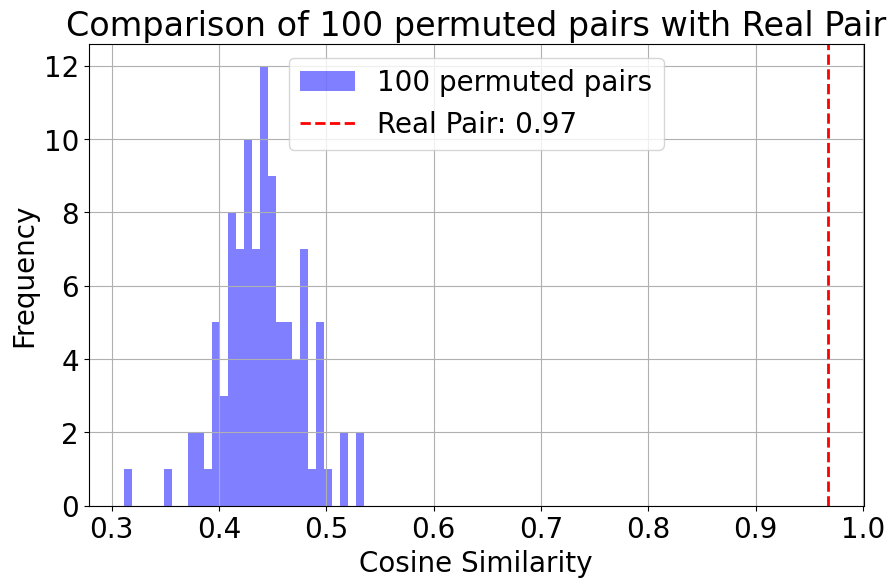

In [63]:
import matplotlib.pyplot as plt
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(cosine_similarities, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(mean_real_similarity, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {mean_real_similarity:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('KG_cos_TransE.png')
plt.show()


In [100]:
matrix1 = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 122]])
np.random.shuffle(matrix1)

matrix1

array([[  9,  10,  11, 122],
       [  1,   2,   3,   4],
       [  5,   6,   7,   8]])

# Retrieval accuracy

In [69]:
np.random.seed(2)

In [70]:
user_embedding = torch.load('./KG_embedding/300_epochs_DistMult_gpu34.pt', map_location ='cpu')
user_embedding = user_embedding.numpy()
groups = users_df.groupby(['gender', 'age'])

for name, group in groups:
    indices = list(group.index)
    
import numpy as np

# Define the group information
groups = [('F', 1), ('F', 18), ('F', 25), ('F', 35), ('F', 45), ('F', 50), ('F', 56),
          ('M', 1), ('M', 18), ('M', 25), ('M', 35), ('M', 45), ('M', 50), ('M', 56)]

# Create a dictionary to map the group information to the corresponding index
group_dict = {(gender, age): i for i, (gender, age) in enumerate(groups)}

# Initialize the boolean indicator array
group_indicator = np.zeros((len(groups), 9))

# Set the corresponding elements in each row to 1
for gender, age in groups:
    index = group_dict[(gender, age)]
    if gender == 'F':
        group_indicator[index, 0] = 1
    else:
        group_indicator[index, 1] = 1
    if age == 1:
        group_indicator[index, 2] = 1
    elif age == 18:
        group_indicator[index, 3] = 1
    elif age == 25:
        group_indicator[index, 4] = 1
    elif age == 35:
        group_indicator[index, 5] = 1
    elif age == 45:
        group_indicator[index, 6] = 1
    elif age == 50:
        group_indicator[index, 7] = 1
    elif age == 56:
        group_indicator[index, 8] = 1
        
user_embedding = group_embeddings
user_boolean_embedding = group_indicator

In [71]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def leave_one_out_retrieval(user_embedding, user_boolean_embedding, num_trials=100, num_permutations=100):
    """
    Perform leave-one-out retrieval experiments to compute accuracy of predicting a user's embedding.

    Parameters:
    - user_embedding: np.ndarray
        The embedding matrix of users.
    - user_boolean_embedding: np.ndarray
        The boolean indicator matrix for user attributes.
    - num_trials: int, optional (default=100)
        Number of trials to run in each experiment.
    - num_permutations: int, optional (default=100)
        Number of permutations (shuffles) to perform in permuted experiments.

    Returns:
    - accuracy_real: float
        The accuracy of retrieval on real embeddings.
    - accuracies_permuted: list of floats
        The accuracies of retrieval on permuted embeddings for each permutation.
    """
    num_users = user_embedding.shape[0]

    # --- Real Data Experiment ---
    count_real = 0
    for _ in range(num_trials):
        # Select a random user index to remove
        removed_user_index = np.random.randint(num_users)

        # Remove the selected user from both matrices
        user_embedding1 = np.delete(user_embedding, removed_user_index, axis=0)
        user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)

        # Compute the attribute_embedding using the remaining users
        attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)

        # Compute the predicted embedding for the removed user
        removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)

        # Compute the cosine similarity between the predicted embedding and all user embeddings
        similarities = cosine_similarity(user_embedding, [removed_user]).flatten()
        # Get the index of the user with highest cosine similarity
        highest_sim_index = np.argmax(similarities)
        # Check if the index matches the removed user
        if highest_sim_index == removed_user_index:
            count_real += 1

    # Compute the accuracy for real embeddings
    accuracy_real = count_real / num_trials
    print("Accuracy with real embeddings:", accuracy_real)

    # --- Permuted Data Experiments ---
    accuracies_permuted = []
    for _ in range(num_permutations):
        count_permutation = 0
        # Shuffle the user embeddings
        shuffled_embedding = user_embedding.copy()
        np.random.shuffle(shuffled_embedding)

        for _ in range(num_trials):
            # Select a random user index to remove
            removed_user_index = np.random.randint(num_users)

            # Remove the selected user from both matrices
            user_embedding1 = np.delete(shuffled_embedding, removed_user_index, axis=0)
            user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)

            # Compute the attribute_embedding using the remaining users
            attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)

            # Compute the predicted embedding for the removed user
            removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)

            # Compute the cosine similarity between the predicted embedding and all user embeddings
            similarities = cosine_similarity(shuffled_embedding, [removed_user]).flatten()
            # Get the index of the user with highest cosine similarity
            highest_sim_index = np.argmax(similarities)
            # Check if the index matches the removed user
            if highest_sim_index == removed_user_index:
                count_permutation += 1

        # Compute accuracy for this permutation
        accuracy_permutation = count_permutation / num_trials
        accuracies_permuted.append(accuracy_permutation)

    # Compute mean accuracy for permuted embeddings
    mean_accuracy_permuted = np.mean(accuracies_permuted)
    print("Mean accuracy with permuted embeddings:", mean_accuracy_permuted)

    return accuracy_real, accuracies_permuted


In [72]:
# Assuming you have your user_embedding and user_boolean_embedding defined
accuracy_real, accuracies_permuted = leave_one_out_retrieval(
    user_embedding=user_embedding,
    user_boolean_embedding=user_boolean_embedding,
    num_trials=100,
    num_permutations=100
)


Accuracy with real embeddings: 0.83
Mean accuracy with permuted embeddings: 0.027599999999999993


In [73]:
Normalized_retrieval_accuracy = (accuracy_real-np.mean(accuracies_permuted))/(1-np.mean(accuracies_permuted))
Normalized_retrieval_accuracy

0.8251748251748251

In [74]:
min(accuracies_permuted),max(accuracies_permuted)

(0.0, 0.46)

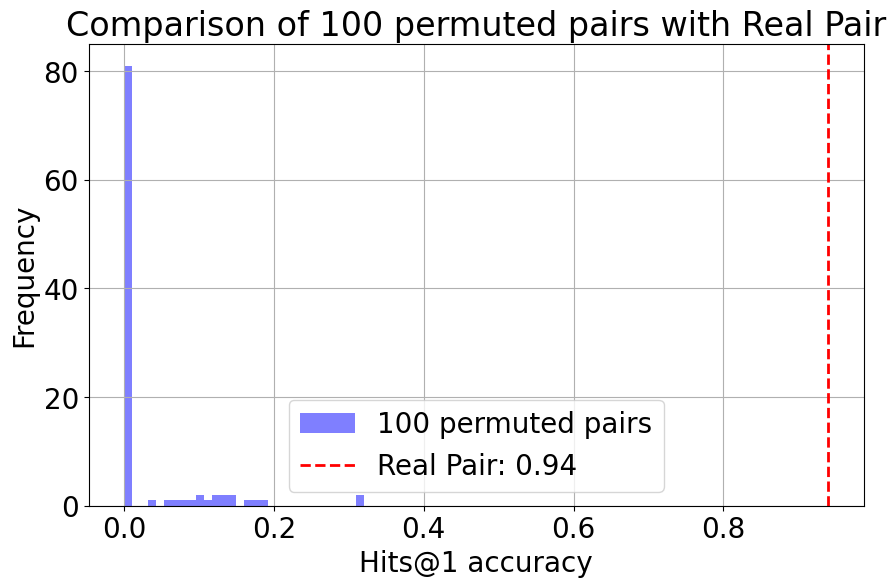

In [43]:
import matplotlib.pyplot as plt
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(accuracies_permuted, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(accuracy_real, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {accuracy_real:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('Hits@1 accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('KG_hits1_TransE.png')
plt.show()


# Dempose linear system by gender, age and occupation

In [50]:
user_embedding = torch.load('../../PycharmProjects/MovieLens/embedding/300epochs.pt', map_location ='cpu')
user_embedding = user_embedding.numpy()

In [51]:
groups = users_df.groupby(['gender', 'age','occupation'])
for name, group in groups:
    indices = list(group.index)
    print('Gender:', name[0], ', Age:', name[1], ', Occupation:', name[2],', Number of users:', len(group), ', Indices:', indices)

Gender: F , Age: 1 , Occupation: K-12 student , Number of users: 63 , Indices: [0, 50, 74, 85, 98, 118, 193, 209, 467, 469, 483, 605, 628, 633, 887, 1044, 1087, 1153, 1194, 1347, 1364, 1420, 1433, 1507, 1562, 1567, 1928, 2132, 2136, 2154, 2161, 2201, 2284, 2345, 2417, 2656, 2809, 2857, 3381, 3603, 3666, 3842, 3864, 4085, 4157, 4492, 4548, 4571, 4574, 4605, 4689, 4882, 5062, 5113, 5246, 5301, 5458, 5513, 5523, 5524, 5755, 5843, 5988]
Gender: F , Age: 1 , Occupation: academic/educator , Number of users: 1 , Indices: [3086]
Gender: F , Age: 1 , Occupation: artist , Number of users: 2 , Indices: [742, 4255]
Gender: F , Age: 1 , Occupation: executive/managerial , Number of users: 1 , Indices: [5767]
Gender: F , Age: 1 , Occupation: other , Number of users: 9 , Indices: [1186, 1925, 2044, 3233, 5295, 5686, 5750, 5839, 6005]
Gender: F , Age: 1 , Occupation: unemployed , Number of users: 2 , Indices: [5410, 5419]
Gender: F , Age: 18 , Occupation: K-12 student , Number of users: 3 , Indices: [4

In [52]:
groupname=[]
for name, group in groups:
    groupname.append(name)
groupname

[('F', 1, 'K-12 student'),
 ('F', 1, 'academic/educator'),
 ('F', 1, 'artist'),
 ('F', 1, 'executive/managerial'),
 ('F', 1, 'other'),
 ('F', 1, 'unemployed'),
 ('F', 18, 'K-12 student'),
 ('F', 18, 'academic/educator'),
 ('F', 18, 'artist'),
 ('F', 18, 'clerical/admin'),
 ('F', 18, 'college/grad student'),
 ('F', 18, 'customer service'),
 ('F', 18, 'doctor/health care'),
 ('F', 18, 'executive/managerial'),
 ('F', 18, 'homemaker'),
 ('F', 18, 'lawyer'),
 ('F', 18, 'other'),
 ('F', 18, 'programmer'),
 ('F', 18, 'sales/marketing'),
 ('F', 18, 'scientist'),
 ('F', 18, 'self-employed'),
 ('F', 18, 'technician/engineer'),
 ('F', 18, 'unemployed'),
 ('F', 18, 'writer'),
 ('F', 25, 'academic/educator'),
 ('F', 25, 'artist'),
 ('F', 25, 'clerical/admin'),
 ('F', 25, 'college/grad student'),
 ('F', 25, 'customer service'),
 ('F', 25, 'doctor/health care'),
 ('F', 25, 'executive/managerial'),
 ('F', 25, 'homemaker'),
 ('F', 25, 'lawyer'),
 ('F', 25, 'other'),
 ('F', 25, 'programmer'),
 ('F', 25,

In [53]:
# Compute average embedding for each group and save to numpy array
group_embeddings = []
for name, group in groups:
    indices = list(group.index)
    group_user_embeddings = user_embedding[indices]
    group_average_embedding = np.mean(group_user_embeddings, axis=0)
    group_embeddings.append(group_average_embedding)

group_embeddings = np.array(group_embeddings)
group_embeddings.shape

(241, 50)

In [54]:
groupdf = pd.DataFrame(groupname, columns=['gender', 'age','occupation'])
groupdf

,gender,age,occupation
0,F,1,K-12 student
1,F,1,academic/educator
2,F,1,artist
3,F,1,executive/managerial
4,F,1,other
...,...,...,...
236,M,56,self-employed
237,M,56,technician/engineer
238,M,56,tradesman/craftsman
239,M,56,unemployed


In [55]:
encode_attribute = pd.get_dummies(groupdf[['gender', 'age','occupation']].astype(str))
encode_attribute

,gender_F,gender_M,age_1,age_18,age_25,age_35,age_45,age_50,age_56,occupation_K-12 student,...,occupation_other,occupation_programmer,occupation_retired,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer
0,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
237,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
238,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
239,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [59]:
user_boolean_embedding = encode_attribute.to_numpy()[:,:]
user_boolean_embedding.shape
user_embedding =group_embeddings

In [60]:
attribute_embedding = np.linalg.pinv(user_boolean_embedding).dot(user_embedding)

In [61]:
B = np.dot(user_boolean_embedding, attribute_embedding)

In [64]:
np.random.seed(2)

In [65]:
from sklearn.utils import shuffle
from numpy.linalg import norm
i = 0
r_norm = []
while i < 100:
    user_embedding_shuffled = shuffle(user_embedding)
    attribute_embedding_shuffled = np.linalg.pinv(user_boolean_embedding).dot(user_embedding_shuffled)
    B_shuffled = np.dot(user_boolean_embedding, attribute_embedding_shuffled)
    r_norm.append(norm(B_shuffled - user_embedding_shuffled))
    i = i+1
r_norm

[18.696150846598616,
 18.655944748292463,
 18.896693033861112,
 18.83401885941921,
 18.947670815837405,
 18.533839386991477,
 19.08431289928254,
 18.838942312072728,
 18.928586796811242,
 18.940283296345697,
 18.80527580990555,
 18.983750322034034,
 19.01308514151102,
 18.863426769762174,
 18.874530291449545,
 18.87563321104559,
 19.043585367306974,
 19.079259209404896,
 19.007307723639464,
 18.600624588019322,
 19.00876425105864,
 19.05289686995564,
 18.872118881317775,
 18.881672880751577,
 19.13806205789211,
 19.123826123573217,
 18.84924790012468,
 18.955240183742706,
 18.99952965712174,
 18.979835848045234,
 18.85383795038576,
 18.692277072768512,
 18.641936175250112,
 19.01818668246595,
 18.32367515902947,
 19.054068438830765,
 18.960271379168795,
 19.102159456231238,
 18.886479831084657,
 18.85966118898298,
 18.817664378624066,
 18.67440595543949,
 18.843767835996946,
 18.725171196302004,
 18.71747564820285,
 19.0797646990122,
 19.13979120870236,
 18.582344795679052,
 18.8169934

In [66]:
min(r_norm), max(r_norm)

(18.312730475582747, 19.13979120870236)

In [67]:
real_norm = norm(B - user_embedding)
real_norm

17.538975438707837

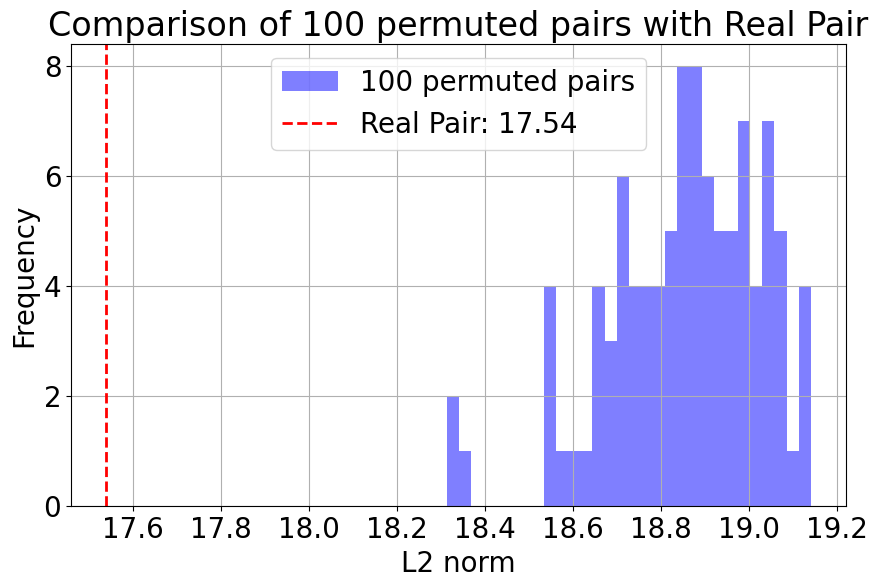

In [68]:
import matplotlib.pyplot as plt
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(r_norm, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(real_norm, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {real_norm:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('L2 norm')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('KG_occupation_L2.png')
plt.show()


# Cosine Similarity

In [69]:
user_embedding = torch.load('../../PycharmProjects/MovieLens/embedding/300epochs.pt', map_location ='cpu')
user_embedding = user_embedding.numpy()
groups = users_df.groupby(['gender', 'age','occupation'])
groupname=[]
for name, group in groups:
    groupname.append(name)
group_embeddings = []
for name, group in groups:
    indices = list(group.index)
    group_user_embeddings = user_embedding[indices]
    group_average_embedding = np.mean(group_user_embeddings, axis=0)
    group_embeddings.append(group_average_embedding)

group_embeddings = np.array(group_embeddings)
groupdf = pd.DataFrame(groupname, columns=['gender', 'age','occupation'])
encode_attribute = pd.get_dummies(groupdf[['gender', 'age','occupation']].astype(str))
user_boolean_embedding = encode_attribute.to_numpy()[:,:]
user_boolean_embedding.shape
user_embedding =group_embeddings

In [71]:
real_similarities = []

for i in range(10000):
    user_embedding = group_embeddings
    user_boolean_embedding = encode_attribute.to_numpy()[:,:]
    # Select a random user to remove
    removed_user_index = np.random.choice(241)
    
    # Remove the selected user from both matrices
    user_embedding2 = np.delete(user_embedding, removed_user_index, axis=0)
    user_boolean_embedding2 = np.delete(user_boolean_embedding, removed_user_index, axis=0)

    # Compute the attribute_embedding using the remaining users
    attribute_embedding = np.linalg.pinv(user_boolean_embedding2).dot(user_embedding2)

    # Compute the predicted embedding for the removed user
    removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)

    # Compute the similarity between the predicted embedding and the real embedding
    real_user_embedding = user_embedding[removed_user_index]
    similarity = np.dot(removed_user, real_user_embedding) / (np.linalg.norm(removed_user) * np.linalg.norm(real_user_embedding))
    similarity = np.clip(similarity, -1, 1)
    real_similarities.append(similarity)

mean_real_similarity = np.mean(real_similarities)
print("Mean similarity with real embeddings:", np.mean(real_similarities))


Mean similarity with real embeddings: 0.9769355932287477


In [74]:
np.random.seed(2)

In [75]:
# Permute the user embedding by row 100 times
num_permutations = 1000
cosine_similarities = []
for i in range(100):
    mean_for_1 = []
    for i in range(num_permutations):
        np.random.shuffle(user_embedding)
        removed_user_index = np.random.choice(241)

        # Remove the selected user from both matrices
        user_embedding2 = np.delete(user_embedding, removed_user_index, axis=0)
        user_boolean_embedding2 = np.delete(user_boolean_embedding, removed_user_index, axis=0)



        # Compute the attribute_embedding using the remaining users
        attribute_embedding = np.linalg.pinv(user_boolean_embedding2).dot(user_embedding2)

        # Compute the predicted embedding for the removed user
        removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)
        real_user_embedding = user_embedding[removed_user_index]
        permuted_cosine_similarity = np.dot(removed_user, real_user_embedding) / (np.linalg.norm(removed_user) * np.linalg.norm(real_user_embedding))
        permuted_cosine_similarity = np.clip(permuted_cosine_similarity, -1, 1)
        mean_for_1.append(permuted_cosine_similarity)
    cosine_similarities.append(np.mean(mean_for_1))

# Print the results

print("Mean similarity with permuted embeddings:", np.mean(cosine_similarities))

Mean similarity with permuted embeddings: 0.9719504106089987


In [76]:
min(cosine_similarities),max(cosine_similarities)

(0.9693762825052911, 0.9744950717380072)

In [77]:
count = sum(1 for x in cosine_similarities if x > mean_real_similarity)
count

0

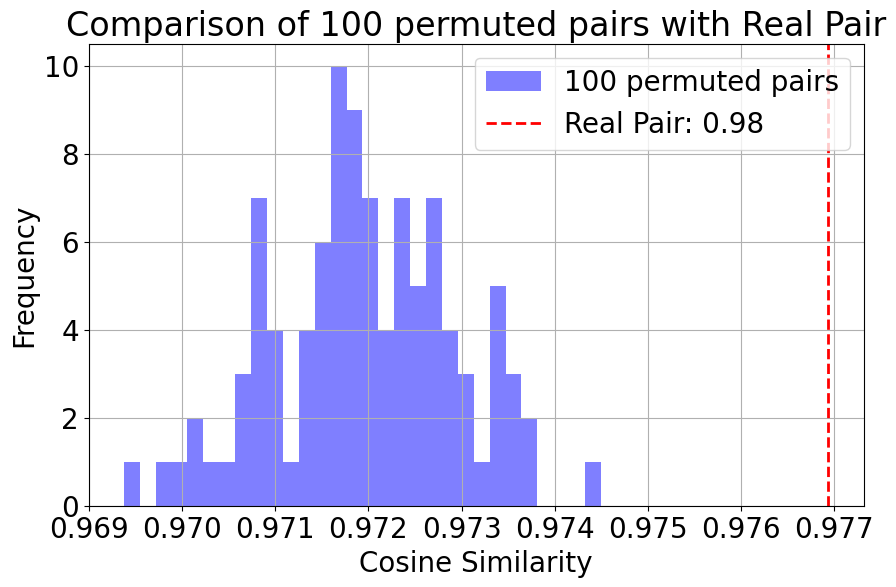

In [78]:
import matplotlib.pyplot as plt
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(cosine_similarities, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(mean_real_similarity, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {mean_real_similarity:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('KG_cos_occupation.png')
plt.show()

# Retrieval Accuracy

In [80]:
user_embedding = torch.load('../../PycharmProjects/MovieLens/embedding/300epochs.pt', map_location ='cpu')
user_embedding = user_embedding.numpy()
groups = users_df.groupby(['gender', 'age','occupation'])
groupname=[]
for name, group in groups:
    groupname.append(name)
group_embeddings = []
for name, group in groups:
    indices = list(group.index)
    group_user_embeddings = user_embedding[indices]
    group_average_embedding = np.mean(group_user_embeddings, axis=0)
    group_embeddings.append(group_average_embedding)

group_embeddings = np.array(group_embeddings)
groupdf = pd.DataFrame(groupname, columns=['gender', 'age','occupation'])
encode_attribute = pd.get_dummies(groupdf[['gender', 'age','occupation']].astype(str))
user_boolean_embedding = encode_attribute.to_numpy()[:,:]
user_boolean_embedding.shape
user_embedding =group_embeddings

In [81]:
from sklearn.metrics.pairwise import cosine_similarity


num_users = user_embedding.shape[0]
num_trials = 241
count = 0

for i in range(241):
    # Select a random user to remove
    removed_user_index = i

    # Remove the selected user from both matrices
    user_embedding2 = np.delete(user_embedding, removed_user_index, axis=0)
    user_boolean_embedding2 = np.delete(user_boolean_embedding, removed_user_index, axis=0)

    # Compute the attribute_embedding using the remaining users
    attribute_embedding = np.linalg.pinv(user_boolean_embedding2).dot(user_embedding2)

    # Compute the predicted embedding for the removed user
    removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)

    # Compute the cosine similarity between the predicted embedding and all user embeddings
    similarities = cosine_similarity(user_embedding, [removed_user]).flatten()
    # Get the indices of the top 10 users with highest cosine similarity
    top_10_sim_indices = np.argpartition(similarities, -10)[-10:]

    # Check if the index of the removed word is in the top 10
    if removed_user_index in top_10_sim_indices:
        count += 1

# Compute the accuracy
accuracy_real = count / num_trials
print("Accuracy:", accuracy_real)

Accuracy: 0.22406639004149378


In [85]:
np.random.seed(2)

In [86]:
num_users = user_embedding.shape[0]
num_trials = 241
accuracies= []
for i in range(100):
    count_for_1 = 0
    for j in range(num_trials):
        np.random.shuffle(user_embedding)
        # Select a random user to remove
        removed_user_index = j

        # Remove the selected user from both matrices
        user_embedding1 = np.delete(user_embedding, removed_user_index, axis=0)
        user_boolean_embedding1 = np.delete(user_boolean_embedding, removed_user_index, axis=0)

        # Compute the attribute_embedding using the remaining users
        attribute_embedding = np.linalg.pinv(user_boolean_embedding1).dot(user_embedding1)

        # Compute the predicted embedding for the removed user
        removed_user = np.dot(user_boolean_embedding[removed_user_index], attribute_embedding)

        # Compute the cosine similarity between the predicted embedding and all user embeddings
        similarities = cosine_similarity(user_embedding, [removed_user]).flatten()
        # Get the indices of the top 10 users with highest cosine similarity
        top_10_sim_indices = np.argpartition(similarities, -10)[-10:]
        # Check if the index of the removed word is in the top 10
        if removed_user_index in top_10_sim_indices:
            count_for_1 += 1
    accuracy = count_for_1 / num_trials
    accuracies.append(accuracy)
accuracies

[0.04979253112033195,
 0.02074688796680498,
 0.03734439834024896,
 0.03734439834024896,
 0.04979253112033195,
 0.04564315352697095,
 0.03319502074688797,
 0.03734439834024896,
 0.04979253112033195,
 0.06224066390041494,
 0.04149377593360996,
 0.03734439834024896,
 0.058091286307053944,
 0.029045643153526972,
 0.05394190871369295,
 0.04979253112033195,
 0.029045643153526972,
 0.02074688796680498,
 0.04564315352697095,
 0.029045643153526972,
 0.04564315352697095,
 0.016597510373443983,
 0.04564315352697095,
 0.03734439834024896,
 0.03319502074688797,
 0.024896265560165973,
 0.04149377593360996,
 0.03319502074688797,
 0.016597510373443983,
 0.04564315352697095,
 0.04979253112033195,
 0.03319502074688797,
 0.04979253112033195,
 0.03734439834024896,
 0.02074688796680498,
 0.04979253112033195,
 0.04149377593360996,
 0.06639004149377593,
 0.03319502074688797,
 0.04564315352697095,
 0.03734439834024896,
 0.03319502074688797,
 0.04149377593360996,
 0.02074688796680498,
 0.04149377593360996,
 0.

In [87]:
min(accuracies),max(accuracies)

(0.016597510373443983, 0.06639004149377593)

In [88]:
count = sum(1 for x in accuracies if x > accuracy_real)
count

0

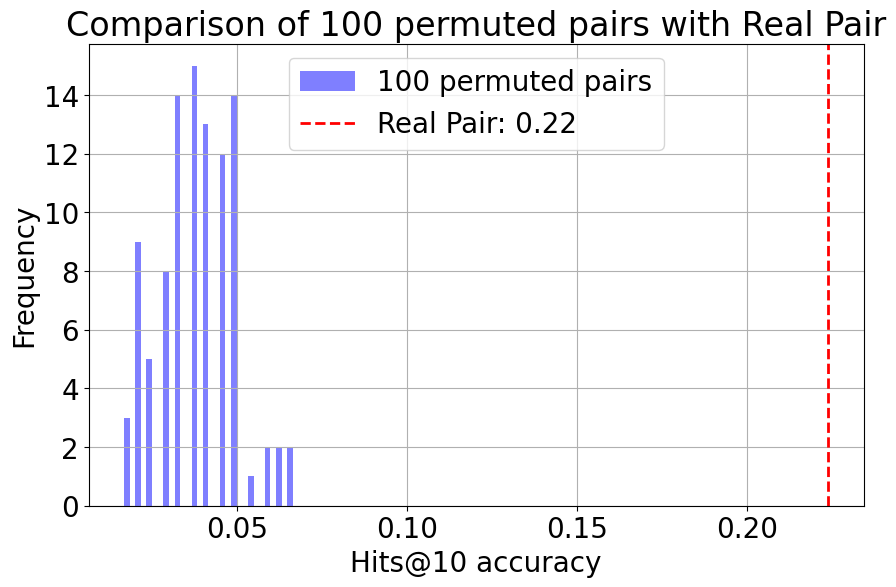

In [89]:
import matplotlib.pyplot as plt
# Creating the histogram
plt.figure(figsize=(10,6))
plt.hist(accuracies, bins=30, alpha=0.5, label="100 permuted pairs", color='b')

# Adding the line to mark the value
plt.axvline(accuracy_real, color='r', linestyle='dashed', linewidth=2, label=f"Real Pair: {accuracy_real:.2f}")

plt.title('Comparison of 100 permuted pairs with Real Pair')
plt.xlabel('Hits@10 accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('KG_occuptation_hits10.png')
plt.show()

In [192]:
from sklearn.utils import shuffle
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a = shuffle(matrix)
a

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

In [193]:
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])